<a href="https://colab.research.google.com/github/AngelRP8791/descriptive-statistics-exercises-project-with-python/blob/main/Estad%C3%ADstica_Descript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Problemas de Estadística Descriptiva
Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?
En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:



In [224]:
# Ángel Reséndiz Plata
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import seaborn as sns

In [225]:
# Cargar dataset de IMDb
url = "https://raw.githubusercontent.com/4GeeksAcademy/descriptive-statistics-exercises-project-with-python/refs/heads/main/assets/imdb_1000.csv"

In [226]:
df = pd.read_csv(url)

In [227]:
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [228]:
# # Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título

df["Title_length"] = df["title"].apply(len)
df
# se agregó la columna "Title_length" en la que se indican la cantidad de caracteres por título

,star_rating,title,content_rating,genre,duration,actors_list,Title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [229]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df["Title_length"].mean()
mediana = df["Title_length"].median()
moda = df["Title_length"].mode()

print(f"Media: {media:.2f},\nMediana: {mediana:.2f},\nModa: {moda}")

Media: 15.48,
Mediana: 14.00,
Moda: 0    12
Name: Title_length, dtype: int64


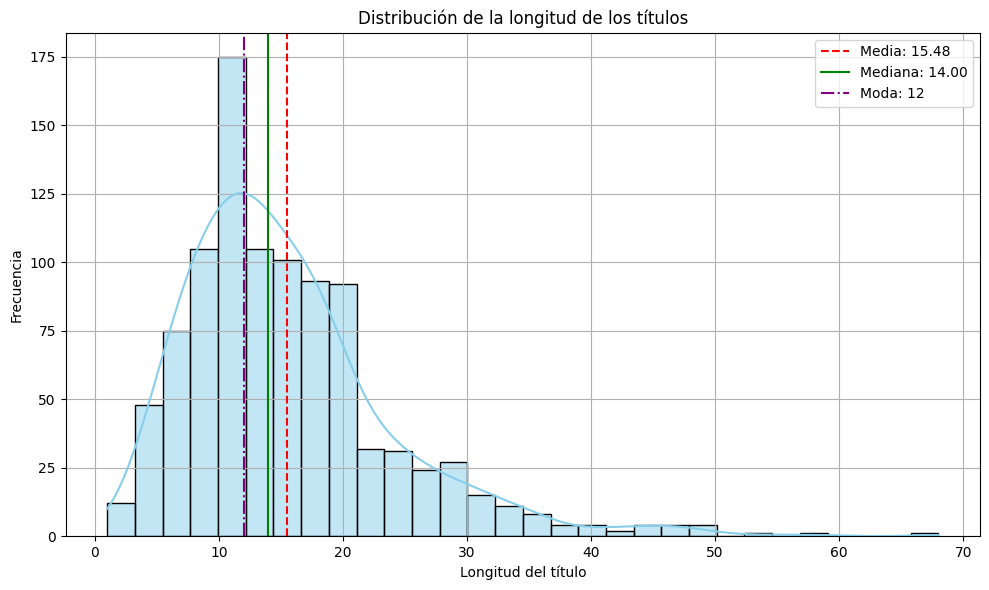

In [230]:
#crea una gráfica
plt.figure(figsize=(10, 6))
sns.histplot(df["Title_length"], kde=True, bins=30, color='skyblue')

# Agregar líneas verticales para media, mediana y moda
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')

# Itera a través de los valores de "moda" y agrega una linea vertical para cada uno
for i, m in enumerate(moda):
    if i == 0:
        plt.axvline(m, color='purple', linestyle='-.', label=f'Moda: {", ".join(map(str, moda))}')
    else:
        plt.axvline(m, color='purple', linestyle='-.')


# Etiquetas y leyenda
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Longitud del título")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [231]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["Title_length"].max() - df["Title_length"].min()
varianza = df["Title_length"].var()
desv_std = df["Title_length"].std()

print(f"Rango: {rango:.2f}\nVarianza: {varianza:.2f}\nDesviación Estándar: {desv_std:.2f}")

Rango: 67.00
Varianza: 72.11
Desviación Estándar: 8.49


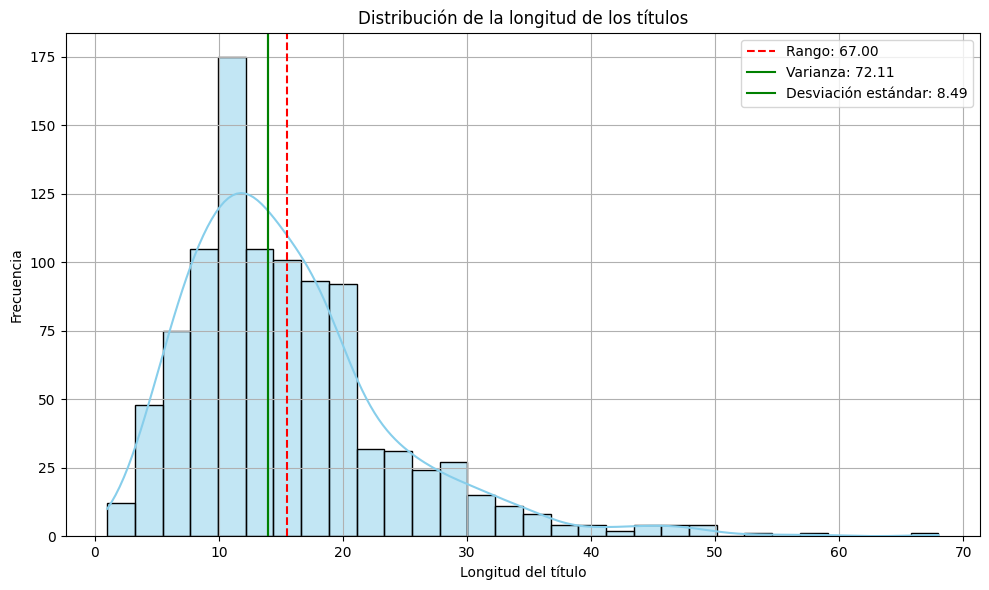

In [232]:
#crea una gráfica
plt.figure(figsize=(10, 6))
sns.histplot(df["Title_length"], kde=True, bins=30, color='skyblue')

# Agregar líneas verticales para media, mediana y moda
plt.axvline(media, color='red', linestyle='--', label=f'Rango: {rango:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Varianza: {varianza:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Desviación estándar: {desv_std:.2f}')

# Etiquetas y leyenda
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Longitud del título")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [233]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetría = df["Title_length"].skew()
kurtosis = df["Title_length"].kurt()
print(f"Asimetría: {asimetría:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Asimetría: 1.53
Kurtosis: 3.81


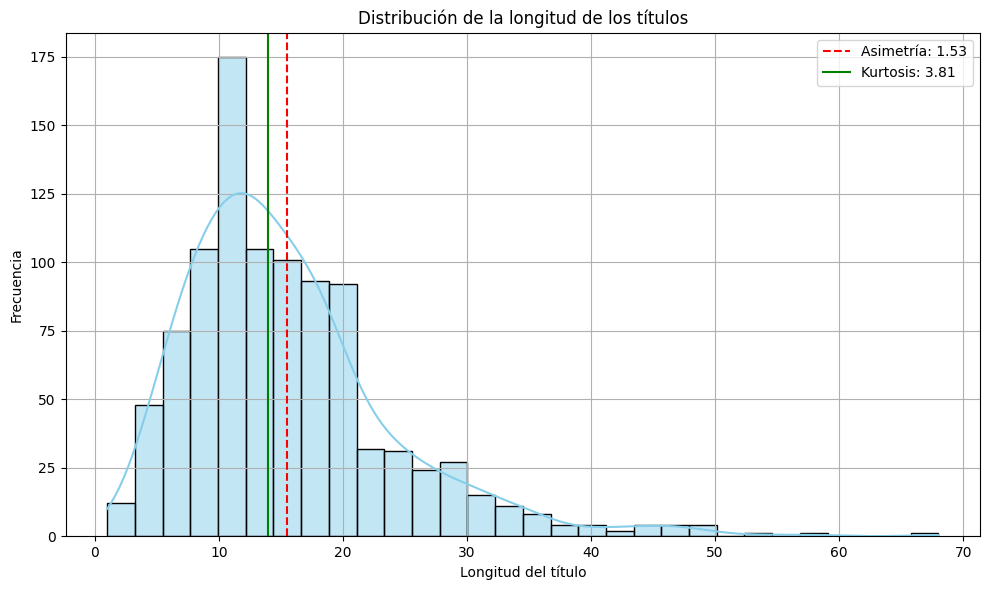

In [234]:
#crea una gráfica
plt.figure(figsize=(10, 6))
sns.histplot(df["Title_length"], kde=True, bins=30, color='skyblue')

# Agregar líneas verticales para media, mediana y moda
plt.axvline(media, color='red', linestyle='--', label=f'Asimetría: {asimetría:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Kurtosis: {kurtosis:.2f}')

# Etiquetas y leyenda
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Longitud del título")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [235]:
# Imprime el título más corto y el título más largo según su longitud
Título_largo = df[df["Title_length"] == df["Title_length"].max()]["title"].values[0]

Título_corto = df[df["Title_length"] == df["Title_length"].min()]["title"].values[0]

print("Título más largo:",Título_largo)
print("Título más corto:",Título_corto)


Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Título más corto: M


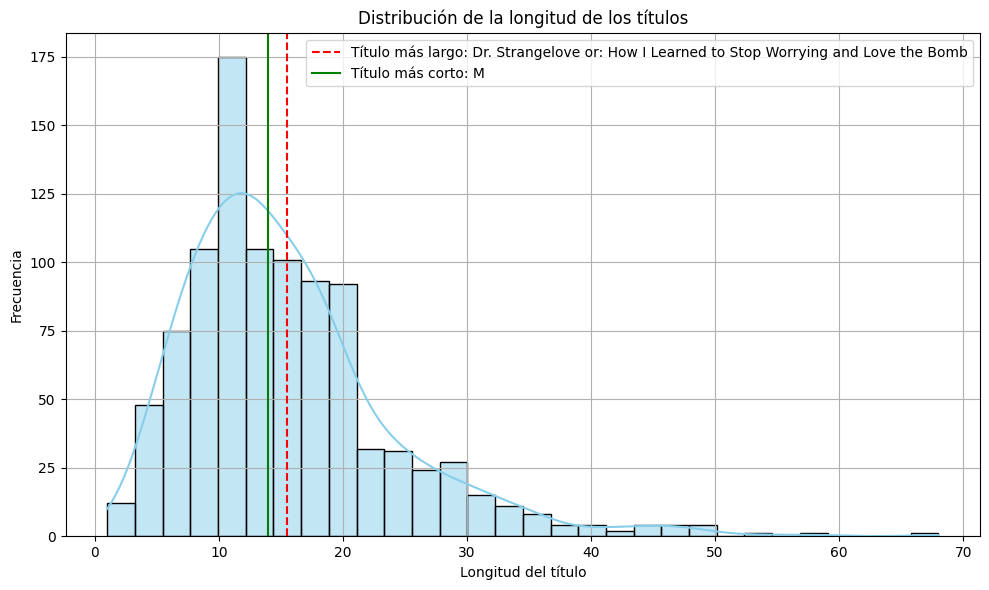

In [236]:
#crea una gráfica
plt.figure(figsize=(10, 6))
sns.histplot(df["Title_length"], kde=True, bins=30, color='skyblue')

# Agregar líneas verticales para media, mediana y moda
plt.axvline(media, color='red', linestyle='--', label=f'Título más largo: {Título_largo}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Título más corto: {Título_corto}')

# Etiquetas y leyenda
plt.title("Distribución de la longitud de los títulos")
plt.xlabel("Longitud del título")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.

In [237]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

Cinco_Tit = random.choices(df["Title_length"].tolist(),k = 5)
print(Cinco_Tit)

[10, 34, 14, 21, 18]


In [238]:
# Calcula la media de los 5 valores

CincoTit_med = sum(Cinco_Tit)/len(Cinco_Tit)
CincoTit_med

19.4

In [247]:
# Calcula las diferencias al cuadrado con respecto a la media

Diferencias = []
for num in Cinco_Tit:
    Dif_cuadr = (num - CincoTit_med) ** 2
    Diferencias.append(Dif_cuadr)
print(Diferencias)

[88.35999999999997, 213.16000000000005, 29.159999999999986, 2.5600000000000045, 1.959999999999996]


In [240]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = sum(Diferencias) / len(Diferencias)
desv_std = varianza ** 0.5

print("Varianza:",varianza)
print("Desviación Estándar:",desv_std)

Varianza: 67.03999999999999
Desviación Estándar: 8.187795796183488
